In [9]:
#import my libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from Bio import AlignIO
from math import log2


In [10]:
#set my working directory 
os.chdir('/home/rucs/Comparative_genomics/ncbi-blast-2.13.0+/bin/')

In [11]:
#read in my BLAST alignments into pandas dataframes 
fwd_hits = pd.read_csv('forward_allign_10', header=None)
rev_hits = pd.read_csv('reverse_allign_10', header=None)
self_hits_therm = pd.read_csv('therm_self_allign_10', header=None)
self_hits_prot = pd.read_csv('prot_self_allign_10', header=None)

In [12]:
#I chose output format 10 in my BLAST, so the files did not come with headers and I had to assign them myself 
headers = ["qseqid", "sseqid", "pident", "align_length", "mismatch", "gapopen","qstart", "qend", "sstart", "send", "evalue", 
           "bitscore"]
           
fwd_hits.columns = headers
rev_hits.columns = headers
self_hits_therm.columns = headers
self_hits_prot.columns = headers

In [33]:
#perform inner join on the forward and reverse BLASTs
besthit = pd.merge(fwd_hits, rev_hits[['qseqid', 'sseqid']], left_on='sseqid', right_on='qseqid', how='inner')

In [34]:
# Remove proteins that are not reciprocal 
besthit = besthit.loc[besthit.qseqid_x == besthit.sseqid_y]


In [35]:
# Remove duplicates by sorting/keeping only maximum values
besthit = besthit.groupby(['qseqid_x', 'sseqid_x']).max()

In [36]:
#Sort by e value
besthit = besthit.sort_values(by = ['evalue'], ascending = True, kind='quicksort')

In [37]:
#Keep matches above a threshold 
besthit = besthit[besthit["evalue"] < 0.00001]

In [43]:
besthit.head(100)

pident  align_length  mismatch  gapopen  \
qseqid_x       sseqid_x                                                  
WP_010526260.1 WP_031576321.1  60.633           442       171        3   
WP_010527558.1 WP_031575049.1  42.256          1117       528       19   
WP_010527883.1 WP_031572568.1  60.175           570       218        5   
WP_010528405.1 WP_031572943.1  49.060           585       290        4   
WP_010527046.1 WP_031577585.1  56.623           687       287        6   
...                               ...           ...       ...      ...   
WP_010527846.1 WP_031572955.1  33.711           706       437       14   
WP_010526621.1 WP_031576493.1  39.559           589       326       16   
               WP_242847997.1  42.043           509       284        6   
WP_010526872.1 WP_031572572.1  46.883           401       208        4   
WP_010528268.1 WP_031577996.1  55.526           371       158        2   

                               qstart  qend  sstart  send         evalue  \
qseqid_x       sseqid_x                                                    
WP_010526260.1 WP_031576321.1       5   443      12   453   0.000000e+00   
WP_010527558.1 WP_031575049.1      10  1121       8  1012   0.000000e+00   
WP_010527883.1 WP_031572568.1      28   594      54   617   0.000000e+00   
WP_010528405.1 WP_031572943.1       1   580       8   589   0.000000e+00   
WP_010527046.1 WP_031577585.1       6   692       7   682   0.000000e+00   
...                               ...   ...     ...   ...            ...   
WP_010527846.1 WP_031572955.1      54   737      35   731  8.160000e-135   
WP_010526621.1 WP_031576493.1      20   590       6   582  3.950000e-134   
               WP_242847997.1      31   535       3   504  5.430000e-134   
WP_010526872.1 WP_031572572.1       1   396       1   401  6.240000e-134   
WP_010528268.1 WP_031577996.1      45   415       5   368  1.080000e-133   

                               bitscore        qseqid_y        sseqid_y  
qseqid_x       sseqid_x                                                  
WP_010526260.1 WP_031576321.1     547.0  WP_031576321.1  WP_010526260.1  
WP_010527558.1 WP_031575049.1     879.0  WP_031575049.1  WP_010527558.1  
WP_010527883.1 WP_031572568.1     684.0  WP_031572568.1  WP_010527883.1  
WP_010528405.1 WP_031572943.1     580.0  WP_031572943.1  WP_010528405.1  
WP_010527046.1 WP_031577585.1     800.0  WP_031577585.1  WP_010527046.1  
...                                 ...             ...             ...  
WP_010527846.1 WP_031572955.1     412.0  WP_031572955.1  WP_010527846.1  
WP_010526621.1 WP_031576493.1     400.0  WP_031576493.1  WP_010526621.1  
               WP_242847997.1     399.0  WP_242847997.1  WP_010526621.1  
WP_010526872.1 WP_031572572.1     386.0  WP_031572572.1  WP_010526872.1  
WP_010528268.1 WP_031577996.1     385.0  WP_031577996.1  WP_010528268.1  

[100 rows x 12 columns]

In [44]:
#Select an example ortholog for co-ortholog analysis 
besthit.loc[besthit['sseqid_y']=='WP_010528268.1']

pident  align_length  mismatch  gapopen  \
qseqid_x       sseqid_x                                                  
WP_010528268.1 WP_031577996.1  55.526           371       158        2   
               WP_031577489.1  55.526           371       158        2   

                               qstart  qend  sstart  send         evalue  \
qseqid_x       sseqid_x                                                    
WP_010528268.1 WP_031577996.1      45   415       5   368  1.080000e-133   
               WP_031577489.1      45   415       5   368  1.280000e-133   

                               bitscore        qseqid_y        sseqid_y  
qseqid_x       sseqid_x                                                  
WP_010528268.1 WP_031577996.1     385.0  WP_031577996.1  WP_010528268.1  
               WP_031577489.1     385.0  WP_031577489.1  WP_010528268.1

In [45]:
#See if the match is found also in the reverse hits 
besthit.loc[besthit['qseqid_y']=='WP_031577489.1']

,,pident,align_length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qseqid_y,sseqid_y
qseqid_x,sseqid_x,,,,,,,,,,,,
WP_010528268.1,WP_031577489.1,55.526,371,158,2,45,415,5,368,1.280000e-133,385.0,WP_031577489.1,WP_010528268.1
WP_029626674.1,WP_031577489.1,48.387,403,174,6,1,403,2,370,3.840000e-105,311.0,WP_031577489.1,WP_029626674.1


In [40]:
#Identify paralogs of the co-ortholog 
self_hits_prot.loc[self_hits_prot['qseqid']=='WP_031577996.1']

,qseqid,sseqid,pident,align_length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
38477,WP_031577996.1,WP_031577996.1,100.000,370,0,0,1,370,1,370,0.00,711.0
38478,WP_031577996.1,WP_031577489.1,99.730,370,1,0,1,370,1,370,0.00,709.0
38479,WP_031577996.1,WP_031577065.1,39.130,69,35,3,19,87,1084,1145,0.71,28.5
38480,WP_031577996.1,WP_031573791.1,38.095,42,26,0,296,337,182,223,1.30,27.3
38481,WP_031577996.1,WP_031574280.1,36.111,36,22,1,240,275,276,310,1.80,26.9
38482,WP_031577996.1,WP_051651631.1,48.000,25,13,0,232,256,132,156,2.00,26.6
38483,WP_031577996.1,WP_242848005.1,27.434,113,53,6,11,118,316,404,2.80,26.2
38484,WP_031577996.1,WP_031574071.1,24.138,29,22,0,316,344,264,292,4.10,25.8
38485,WP_031577996.1,WP_031572826.1,40.741,27,16,0,342,368,30,56,4.60,25.4
38486,WP_031577996.1,WP_051651427.1,26.667,45,33,0,190,234,3,47,8.10,24.6


In [122]:
#read in clustal alignment 
alignment = AlignIO.read(open("/home/rucs/Comparative_genomics/clustalw-2.1-linux-x86_64-libcppstatic/seqdump_complete.aln"), "clustal")

In [5]:
print("Alignment length %i" % alignment.get_alignment_length())

Alignment length 424


In [6]:
print(alignment[0].seq)

----------------------------------------MLNILFDFLNQTGFAAMTLGQFIMILIACTLLFLAIKKGYEPYLLIPIAFGMLLANLP-----LSGVMEE------GGVLNLLYQGVHLGLFPPLIFMGVGAATDFGPLLSNPKSLILGAAAQFGIFFAFLGAIALGFNVMEASSIGIIGGADGPTALYLTSQLAPHLLGPIAVAAYSYMALVPVIQPPIIRALTSKEEREIKMVQLREVSKKEKILFPIVVTILVSLIVPSAAPLVGMLMFGNLIKEVGVVPNLVETAKNPLMYTITIFLGMTVGATANAETFLNTQTLGIIALGLVAFAVGTASGVIVAKIMNLFIK--DKINPMIGAAGVSAVPMAARVVQVEGQKADPSNFLLMHAMGPNVAGVIGSAVAAGLLLTFFG-


In [123]:
#Get columns
sequences = []
for s in alignment:
    sequences.append("%s" % (s.seq))
    

In [48]:
#Calculate Shannon Entropy for each column in the alignment 
all_entropies = [] 
for aindex in range(len(sequences[0])): 
    column_bases = []
    column_entropy = []
    for bacteria in sequences:
        for aa in bacteria[aindex]:
            column_bases.append(aa)
        for aa in column_bases: 
            p = column_bases.count(aa)/len(column_bases)
            entropy = p * log2(p)
            column_entropy.append(entropy)
    sh_entropy = -sum(column_entropy)
    all_entropies.append(sh_entropy)

Text(0, 0.5, 'Shannon Entropy')

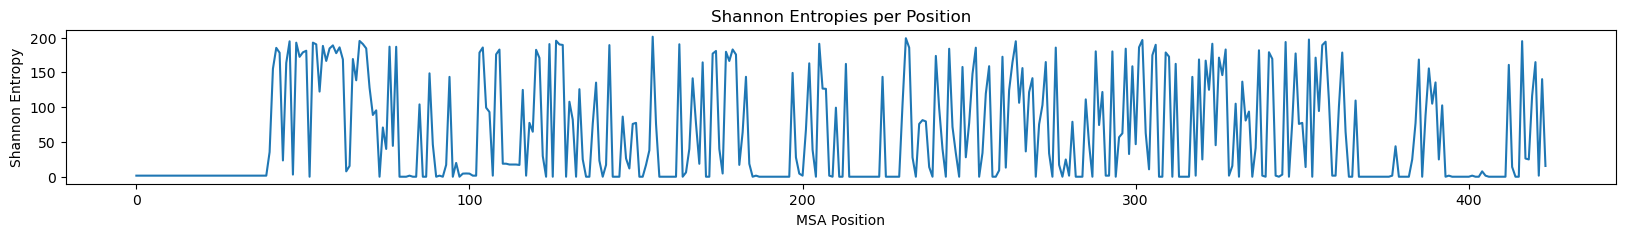

In [132]:
#Plot the Shannon Entropy
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(all_entropies)
plt.title('Shannon Entropies per Position')
plt.xlabel('MSA Position')
plt.ylabel('Shannon Entropy')

In [75]:
#Identify amino acids with a shannon entropy of 0 (complete conservation)
seq1 = sequences[0]
conserved_seqs = ""
for i in range(len(all_entropies)): 
    if all_entropies[i]==0: 
        conserved_seqs = conserved_seqs + seq1[i]
    else: 
        conserved_seqs = conserved_seqs + "-"
        
print(conserved_seqs)

----------------------------------------------------G--------------------L-----YEP-LL-PI--G-L--N-P-------------------------Y-G---G--P--IF---G--TDF-----NP----LGAAAQ-G------GA------------I-IIGGADGPTA-------A----G-IA-AAYSYMALVP-IQPPI----T----R---M---R-----E---FP-----------P----L--M---GNL--E------L------------TI--G-TVGA--------------I---G---F---T--G------M----------NP-IGAAGVSAVP--ARVV---G------N-LLMHAM-PN--GVIGSA--AG--------


In [127]:
#Append conserved sequences to the original alignment 
sequences = sequences + [conserved_seqs]

In [129]:
final = open("final.txt", "w")

In [130]:
final.write(str(sequences))

12412

In [131]:
final.close()